In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
window = 10000 
df = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5_catalog.xml')
dists = []

do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out


In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [6]:
for eq_name in eq_with_data:
    # find matching cat event:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv)
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                print(pick_samples)

                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude

                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200: 
                    dists.append(distance)
                    print(distance)
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)
                    sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                    df[eq_mag_str][int(distance//25)] = sum_abs_displ
                    current = ad[eq_mag_str][int(distance//25)]
                    current.append(abs_displ[pick_samples:pick_samples+window])
                    ad[eq_mag_str][int(distance//25)]= current
                    counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

31462
65.7847377115
31397
49.7824317745
31723
92.7415642848
31359
52.391863729
30798
38.9544976634
30800
47.8328147609
31195
66.8384689429
31581
102.021140835
30502
22.599959216
31730
126.24455109
31476
90.9635002943
30489
25.2988392967
31009
65.5581677754
31686
101.899835889
31477
94.0008296068
31353
83.9030298326
31821
112.722640367
31609
98.2031122216
31429
94.7434655161
31250
60.9048380752
31012
33.7074248932
31291
76.7934336386
34900
98.2817100933
31454
155.298366199
31418
168.989818039
31420
163.871191126
31382
137.407718633
31048
138.425528401
31274
18.8452520753
31298
20.2204925014
31005
65.3303506032
31233
69.6293323868
31256
79.7665213508
31243
97.1523649223
30946
67.9263492327
31752
101.376154162
31479
96.4322608999
31875
118.381010803
30400
38.1156539626
30957
60.2332198847
31393
97.6656332408
31204
97.025436155
31590
122.17642312
30401
40.9739014618
30885
61.1215540745
31727
94.7882370961
31602
96.159543303
31439
123.586766254
31477
131.854938918
31442
128.594759364
31487


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31991
101.933738644
31432
85.1963760615
30763
47.3126220696
30400
25.8348817218
30954
56.5936722893
31511
86.7766199854
30802
45.2860913757
30399
27.3365422605
31038
60.5781605534


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30031
8.98465482253
31968
133.851638593
31726
110.159424622
31488
102.79929868
31572
101.681151788
32347
130.256876567


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32773
126.484968803
30932
73.8550496045
31959
118.630094011
30914
57.7004808645
31256
52.8745113831
31594
113.434808101
31214
87.8844199731
30911
54.0677392999
31849
88.2297895186
30400
28.0465164504
31039
44.3983833602
31039
44.3821316335
31723
73.5469270148
31534
73.5296191001
31521
76.8265932409
30614
49.4362900404
30300
23.5206297711
31489
107.69766198
30700
55.5231730935
30575
37.427064766
30400
35.2858124992
31786
103.459192313
30860
64.3209656722
31681
83.7732420108
31413
33.3939356246
31074
81.8964627136
28480
186.270177178
31365
161.241929824
30299
25.1010479662
31587
122.60042332
31689
56.1076490619
32067
70.2707901442
31936
86.77073719
32180
104.171491947
31579
84.2891779768
31635
46.4239684323
31846
74.1287461785
31595
58.0155019583
31798
73.645726239
34152
52.3502485007


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30384
29.1172815022
31593
112.680611575
32539
121.00347695
31696
84.3769611209
31617
102.466359787
32125
113.363814068


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32226
83.6266723662
31689
99.2051447256
31255
60.0619221286
31494
96.3251635088
30300
11.5183260136
30200
6.85828774964
30800
46.2749350195
30781
42.8463364633
30301
12.590849682
30299
12.2093542532
31002
62.8962754767
30784
43.5095191945
31284
80.2496588238
30300
12.625680506
30399
24.6096633116
30799
46.4314555011
30593
31.2630720369
30300
10.7426172924
30506
27.4826419008
30300
12.4294817013
30200
5.5267685928
30199
8.62156135929
30300
13.3657790982
30300
12.4737787976
30296
10.5046784202
30300
13.7953271524
30300
14.4561209713
30300
14.0990090578


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31506
108.509733319
31030
55.2062736257
31690
102.670030873
31468
130.889575764
31063
83.7763495266
31734
183.238047875
31366
164.385988529
30399
23.4228514917
31596
120.752902899
31800
113.912287732
31604
107.946275878
28153
112.120677058
30760
12.8038778739
31836
104.985018855
31095
65.1472527154
31844
100.77907314
31319
70.4101276762
31795
119.777496822
32220
44.3137223089
31105
55.4802334845


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31571
87.2196270629


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29312
109.185151669


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30440
17.7240177443
31338
78.5753799864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29277
78.891233892


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31728
85.0467936197
32279
136.4384469
30903
50.5773448044
31333
79.5625399544
33824
104.784157228
32171
97.7014008808
31888
108.728359011
31452
90.1138100404
30882
38.7480460927
31016
46.8151845559
31887
138.048472214
31037
63.4261154179
31207
60.1609549874
31598
75.2034627017
32440
112.352889704
30656
38.5374085403
31278
83.6462812682
31552
101.440281161
31136
85.5082238915
30398
25.4180082619
31479
94.545753481
31331
63.8408619285


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31220
45.7178365473
31804
151.965128377


 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 3]):
	check_channel; units mismatch between stages,
	skipping to next response now


31995
106.725887903
31424
71.3333188513
31730
101.160842587
30912
28.4607028515
31485
110.168690359
31652
98.6002910381


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31562
22.606783482
32102
102.721546255
32311
120.724303916
31608
103.430482475
30934
21.0408826091
31646
97.2801201838
31134
53.1578422907
32449
91.9947736286
31583
13.3982935107
31607
24.043987107
31842
74.5024932804
31731
69.6136249308
31805
108.027594998
31661
56.3013936062
31570
13.4214876225
31611
44.5566456772
31712
87.0512680264
32074
163.236479073
31967
137.119117547
32045
153.043988281
31973
151.427485464
31647
62.42377012
32076
137.632569692
31969
127.507487282
31330
68.6129745194
35260
116.629966998
31690
91.4567832858
31706
103.612326574
31899
103.287862065
31808
83.8831807519
32463
109.35281722
31697
158.62723306
30795
61.6037752415
31468
133.291621245
30781
23.9909638379
31305
135.579182034
31433
177.125344551
30898
50.2940493461
31465
97.4580559129
31036
107.663195619
31681
196.520994051
30782
42.6523650647
31689
198.652204216
31607
177.895593057
31387
88.3707442468
31530
31585
31506
195.947309053
31069
69.8994876662
31322
74.0615765131
31322
74.0615765131
31825
95.35491

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31837
108.366649283
31175
69.6447436958
30884
52.2460725803
30666
37.6779948339
30570
30.1557732449
31189
72.9331918299
31292
74.8442679692
31555
97.7158626255
31798
115.201975312
30400
21.9107517828


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30590
33.2688836015
30820
47.8653809395
31439
104.936764045


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31593
111.732363548
31817
173.175054584
31093
58.5495374704


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30617
56.0927553905
31355
60.6770409628
31217
67.0754790441
32244
79.0757315169
31108
60.5119048287
31085
62.0378009362
30924
50.8376029038
31279
68.6420342647
31162
45.4965791309
31321
92.5489395544
30731
51.7663190598
30884
37.8492344125
30884
37.8492344125
31678
79.4222489959
31678
79.4222489959
31648
95.0497159472
31112
50.6096802697
31393
49.1165382637
31393
49.1165382637
31512
86.5164041844
31925
76.6969665632
32048
111.622366499
31573
93.0972885105
30686
27.2232703915
31557
102.663950076
30824
41.4491571443
30401
10.9863995571
30772
39.7824796921
31232
35.9548164085
31624
69.1887001428
31970
105.318202631
31300
76.5456994546
31680
101.366376438
31468
96.7983612361
31174
88.2102784544
31471
97.2773928105
31520
101.894699921
31550
104.197995129
31491
105.552483633
31734
127.907487271
31689
127.36536764
31473
114.138563917
31794
134.609488618
31751
135.799621886
31665
127.45590066
31206
66.4225306504
31424
79.4359560149
31480
80.1595480589
31319
75.9400780418
31357
71.573721225
314

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32326
110.50206299
29320
71.502507956
31226
74.6569619125
31279
73.1239931965
32259
78.6243792731
31639
144.038516524
31471
87.8945162169
31939
184.724287794
31586
81.2058927662
31548
56.9504080495
30926
50.2574964757
32323
119.865921396
31919
112.501350557
32097
136.133816527
32215
97.058339597
32151
114.675433795
31930
78.9201732517
30866
10.9094103127
31708
95.4309929756
31386
70.3511174025
31371
66.7024771429
32019
64.3753373782
31288
99.3230257795
31134
99.457747476
31934
136.53075084
30891
69.2876026332
31289
98.3749035271
31460
104.839763092
31281
95.591363965
31683
105.155359054
31852
108.593798004
31459
102.305641035
31467
97.6041136182
31702
31562
89.6497449076
31061
84.7687704104
31493
155.890857849
31545
194.063669553
31565
144.415911371
31057
76.1325392851
31576
170.69092407
31382
133.1798088
31457
147.806226797
31490
155.90326233
31033
32.3025166207
31163
106.713749114
31505
99.470652833
31853
111.123285457
31608
109.466315316
31468
78.5479929959
31502
89.0862654591
31810

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31976
101.752972458
31071
16.6361706018
31325
86.2853739864
31513
93.9642072974
31659
96.3692956692


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31299
20.1753691027
32265
116.475000498
32265
116.475000498
31892
87.9787846302
31608
41.9581260397
31302
73.0036264022
31873
99.5237065276
31788
95.6821717414
31787
95.642844254
31641
85.2347235345
31467
61.9810560183


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30897
68.0602534118
30827
49.9622609788
31412
72.653934133
31177
64.8324678954


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31865
118.639889101
33937
55.6453297259
31003
58.322446473
31121
71.1060224128
31891
111.586030189
31757
106.455515151
30792
41.9632550748
31422
83.2504114186
31422
83.2504114186
31775
124.658954404
30847
43.4940420776
31675
109.802510217
30860
52.1284141927
31721
107.967029209
30686
47.6267370418
31616
123.282460618
31461
99.428882108
30940
44.4065037171
31319
85.211356676
31353
66.000580748


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31714
86.7160295317
31664
94.0349094407
30664
28.0595930557
30858
34.7917062674
31797
117.464558302
30860
47.2217643351
31844
129.4472695
31758
102.883865013
31277
86.7452219378
31582
80.9839483004
31061
60.078327515
31256
60.059180031
30592
40.1273245557
30707
21.9221610477
29691
42.9594504737
31947
101.55608491
31353
68.0881224893


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31187
65.0489698632
31139
63.1497622244
31843
114.117799146
31851
116.423653391
31606
153.172866373
31517
95.7368264839
31526
94.2018544939
30979
53.9230916862
31050
39.6852775769
31558
96.3968115759
31436
93.4749984327
28836
87.7568814984
31002
58.1954813672
31333
71.9034947974
29704
17.9888621156
31229
70.2712084719
30784
43.8864845637
31218
70.5932972362
31231
114.641986105
31841
121.815604507
21697
121.605311029
21996
109.003270197
31236
85.0993298073
32051
11.9852658305
21500
106.314571963
30815
46.6524616477
30000
32.4063703516
31433
95.809315448
30198
49.988083548
31667
117.874880144
29900
22.8851464558
31551
100.646857625
29900
10.4943810549
31322
91.9242474032
30100
36.21511098
30400
59.662613636
32078
14.1035777292
31041
71.2174956059
29999
27.1847492788
30875
59.9053849329
29274
90.9764070588
30921
55.1083696154
31260
71.614132905
30290
14.147627093
29664
72.6551850799
30700
41.0314857425
28928
72.8858788553
29731
109.179880485
29417
117.599796294
29695
115.702870658
31836
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


In [7]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

In [8]:
displ


JP.JTM..BHZ | 2019-07-01T00:32:36.650000Z - 2019-07-01T00:42:36.600000Z | 100.0 Hz, 59996 samples

In [9]:
df

,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,...,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0
0,"[0.00264377403551, 0.00264843648094, 0.0026538...","[0.000781689337203, 0.000787522098931, 0.00079...","[6.04691061576e-06, 7.7605962613e-06, 9.974826...","[4.11567491043e-05, 4.91334103916e-05, 5.85653...","[0.000563608771655, 0.000637064670234, 0.00071...","[0.000157481093505, 0.000188274056334, 0.00022...","[1.93807563273e-06, 1.94114755324e-06, 1.94385...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[7.12363259889e-07, 1.06954657139e-06, 1.58334...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.03576661242e-07, 1.0232660634e-07, 1.010729...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0017689830911, 0.00176348350097, 0.00175670...","[0.00279176687444, 0.00278976249209, 0.0027879...","[2.6339021281e-06, 2.72792632351e-06, 2.812218...","[5.33092632626e-05, 6.01759825904e-05, 6.75066...","[0.000539508527361, 0.000544795519023, 0.00055...","[8.39114993728e-06, 9.85033748656e-06, 1.15255...","[0.000183814148434, 0.000215710304561, 0.00025...","[3.88989125026e-07, 3.72882682351e-07, 3.49853...","[9.17316901871e-07, 9.28371031057e-07, 9.41372...","[1.43952101402e-07, 1.34645659212e-07, 1.24566...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.52523920444e-06, 1.00585834764e-05, 1.18029...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.91830082119e-05, 2.39648996089e-05, 2.96863...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.55770731543e-08, 5.00018622588e-08, 9.23079...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.00202621800031, 0.00202224571445, 0.0020180...","[0.00205849829785, 0.00205649158059, 0.0020546...","[6.63001312281e-06, 6.85224446634e-06, 7.06865...","[7.20131974289e-05, 7.51055351593e-05, 7.83777...","[0.000173420514619, 0.000185829677738, 0.00019...","[6.96681058084e-07, 9.15396223421e-07, 1.16918...","[7.77811329581e-05, 8.11214146842e-05, 8.48175...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.000189946876636, 0.00020350882962, 0.000217...","[1.55712805844e-06, 1.57250142146e-06, 1.55382...",...,"[4.00487738199e-07, 4.02941432285e-07, 4.05625...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.46402391435e-07, 2.4549078088e-07, 2.445670...","[8.77587441844e-07, 9.28201279677e-07, 9.56351...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.56464241291e-06, 3.00004196099e-06, 3.47820...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.000992793462753, 0.000995499486881, 0.00099...","[0.001911121345, 0.00191987209533, 0.001928423...","[6.63645049399e-06, 6.42794391956e-06, 6.68384...","[3.75955561223e-05, 3.76560561267e-05, 3.78332...","[0.000212482122699, 0.000216748270659, 0.00022...","[7.83700422972e-07, 8.87290491928e-07, 1.01014...","[2.79444051917e-06, 3.11929749701e-06, 3.49899...","[1.59159894522e-06, 1.34330081016e-06, 1.37959...","[3.08795628386e-07, 4.1850850851e-07, 5.528957...","[2.53192716408e-06, 2.98296279669e-06, 3.45826...",...,"[2.87746206069e-05, 2.99046610099e-05, 3.10402...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.18683979753e-06, 3.51346016528e-06, 3.91487...","[2.82537102646e-05, 3.06929896585e-05, 3.33168...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

onto row/column plot
[ 0.32  0.73  1.    1.27  1.84]
5.0 0 0.32 23
[ 0.11  0.59  0.69  0.75  1.18]
5.1 0 0.59 24
[ 0.36  0.62  1.09  1.35  1.53]
5.2 0 0.36 2
[ 0.5   0.93  1.19  1.68  2.4 ]
5.3 0 0.5 11
[ 0.73  1.22  1.56  1.97  3.07]
5.4 0 0.73 24
[ 0.62  0.7   0.99  1.3   1.43]
5.5 0 0.62 2
[ 0.1   0.92  1.8   2.23  2.79]
5.6 0 0.92 2
[ 0.56  0.82  1.27  1.49  1.99]
6.0 0 0.56 2
[ 1.57  1.97  2.6   3.1   3.66]
6.1 0 1.57 2
[ 0.04  1.36  1.8   2.04  2.44]
6.4 0 1.36 3


/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered

[ 0.04  0.52  0.79  1.09  1.52]
5.0 1 0.52 50
[ 0.04  0.37  0.73  0.92  1.56]
5.1 1 0.37 50
[ 0.57  0.99  1.29  1.53  1.62]
5.2 1 0.57 31
[ 0.76  1.1   1.51  2.02  2.21]
5.3 1 0.76 31
[ 0.7   0.92  1.32  1.74  2.29]
5.4 1 0.7 50
[ 0.3   0.84  1.24  1.77  2.15]
5.5 1 0.3 6
[ 0.47  1.09  1.48  2.01  3.01]
5.6 1 0.47 7
[ 0.04  0.52  1.3   1.66  2.08]
5.7 1 0.52 6
[ 0.97  1.32  2.51  2.98  3.3 ]
5.8 1 0.97 30
[ 0.04  1.08  1.65  2.14  3.18]
5.9 1 1.08 31
[ 0.04  0.5   1.09  2.03  2.54]
6.0 1 0.5 2


/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.64  1.37  2.16  2.78  3.67]
6.2 1 0.64 1
[ 0.91  1.38  1.86  2.17  2.47]
6.4 1 0.91 3
[ 1.19  1.46  1.9   2.3   2.95]
6.8 1 1.19 3
[ 0.04  0.49  0.67  1.45  1.53]
5.0 2 0.49 65
[ 0.04  0.45  0.65  0.84  1.04]
5.1 2 0.45 66
[ 0.42  0.56  0.79  1.1   2.08]
5.2 2 0.42 32
[ 0.54  0.93  1.3   1.43  1.78]
5.3 2 0.54 44
[ 0.43  0.6   1.12  1.37  1.64]
5.4 2 0.43 66
[ 0.55  0.99  1.42  2.3   2.49]
5.5 2 0.55 8
[ 0.6   0.97  1.1   1.25  1.4 ]
5.6 2 0.6 45
[ 0.52  0.98  1.57  1.66  2.1 ]
5.8 2 0.52 42
[ 0.59  0.8   1.15  1.4   2.01]
5.9 2 0.59 44
[ 1.36  1.56  2.11  2.36  2.66]
6.0 2 1.36 7
[ 0.57  1.03  1.29  1.62  2.14]
6.1 2 0.57 7
[ 0.04  1.1   1.44  1.63  1.86]
6.3 2 1.1 1
[ 1.81  3.44  4.45  4.8   5.5 ]
6.4 2 1.81 8
[ 0.95  1.3   2.14  2.89  3.21]
6.6 2 0.95 1
[ 0.48  0.58  0.86  0.97  1.13]
5.0 3 0.48 66
[ 0.57  0.89  1.2   1.48  2.33]
5.1 3 0.57 67
[ 0.69  0.95  1.31  1.56  1.73]
5.2 3 0.69 53


/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.56  1.03  1.5   1.87  2.28]
5.3 3 0.56 67
[ 0.54  0.71  0.8   1.08  1.46]
5.4 3 0.54 67
[ 0.57  1.36  1.64  1.94  2.21]
5.5 3 0.57 36
[ 0.76  1.05  1.22  1.38  1.68]
5.6 3 0.76 38
[ 0.63  1.02  1.39  2.24  2.83]
5.7 3 0.63 53
[ 0.71  0.95  1.32  1.54  1.9 ]
5.8 3 0.71 28
[ 0.21  0.87  1.66  1.94  2.55]
5.9 3 0.21 53
[ 1.23  1.76  2.11  2.29  2.48]
6.0 3 1.23 10
[ 1.05  1.32  1.56  2.28  2.48]
6.1 3 1.05 9
[ 0.56  1.21  1.96  2.95  3.66]
6.3 3 0.56 9
[ 1.16  1.63  1.96  2.09  2.3 ]
6.4 3 1.16 11
[ 0.68  0.97  1.33  1.89  2.1 ]
6.6 3 0.68 1
[ 1.13  1.77  2.    2.9   4.  ]
6.7 3 1.13 2


/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.36  0.78  1.23  1.94  2.26]
6.8 3 0.36 11
[ 0.56  1.43  1.73  2.03  2.36]
5.0 4 0.56 56
[ 0.04  0.43  2.26  2.45  3.67]
5.1 4 0.43 56
[ 0.68  1.02  1.23  1.48  1.75]
5.2 4 0.68 21
[ 0.49  1.06  1.4   1.7   1.92]
5.3 4 0.49 56
[ 0.47  0.65  0.93  1.54  1.89]
5.4 4 0.47 56
[ 0.46  1.2   2.38  2.9   4.04]
5.5 4 0.46 4
[ 0.59  1.26  1.61  1.92  2.04]
5.6 4 0.59 38
[ 0.58  1.05  1.55  2.12  2.25]
5.7 4 0.58 4
[ 0.63  1.05  1.39  2.05  2.4 ]
5.8 4 0.63 36
[ 0.56  1.27  1.61  1.98  2.46]
5.9 4 0.56 25
[ 1.22  1.6   1.84  2.67  3.02]
6.0 4 1.22 5
[ 0.65  1.57  2.16  2.39  2.92]
6.3 4 0.65 5
[ 1.29  1.82  2.48  2.58  2.72]
6.4 4 1.29 6
[ 0.36  0.79  1.18  1.63  1.96]
6.6 4 0.36 1
[ 0.73  1.16  1.4   2.43  3.79]
6.7 4 0.73 1
[ 1.32  1.96  2.22  2.38  2.7 ]
6.8 4 1.32 6
[ 0.6   0.79  1.04  1.26  1.67]
5.0 5 0.6 9
[ 0.61  1.23  1.58  2.15  2.58]
5.1 5 0.61 10
[ 0.77  1.01  1.18  1.39  1.82]
5.2 5 0.77 10
[ 0.78  1.02  1.15  1.34  1.75]
5.3 5 0.78 10
[ 0.43  0.79  1.17  1.59  2.13]
5.4 5 0.43 1

/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]


[ 0.75  1.48  1.87  2.52  3.14]
5.6 5 0.75 1
[ 0.56  0.93  1.18  1.64  2.25]
5.7 5 0.56 10
[ 0.67  1.3   1.79  2.13  2.79]
6.0 5 0.67 5
[ 0.04  0.7   0.99  1.54  1.83]
6.3 5 0.7 6
[ 0.06  0.61  0.78  0.9   1.27]
5.0 6 0.61 9
[ 0.04  0.74  1.29  1.6   2.17]
5.1 6 0.74 9
[ 0.96  1.2   1.63  1.8   2.15]
5.2 6 0.96 9
[ 0.39  0.64  1.14  1.74  1.98]
5.3 6 0.39 5
[ 0.62  0.92  1.11  1.54  1.78]
5.4 6 0.62 10


/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered

[ 0.62  0.86  1.17  1.49  1.64]
5.0 7 0.62 10
[ 0.54  0.94  1.19  1.64  2.03]
5.2 7 0.54 10
[ 0.08  0.77  1.07  1.34  1.65]
5.3 7 0.77 11
[ 0.04  0.47  1.22  1.73  2.08]
5.4 7 0.47 9


/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_2185904/2278362243.py:10: RuntimeWarning: invalid value encountered

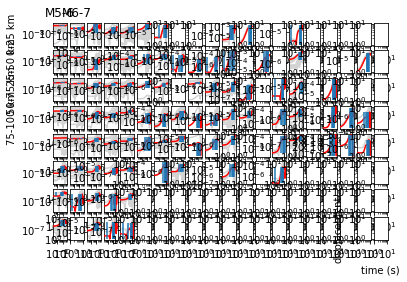

In [10]:
fig, axs = plt.subplots(8, df.shape[1]-1)
print('onto row/column plot')
row_count = 0
results = []
for row in range(8):
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results.append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results.append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = 'red')
        for ind_ad in ad[column][row]:
            axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


axs[0][0].set_title('M5-6')
axs[0][1].set_title('M6-7')
axs[0][0].set_ylabel('0-25 km')
axs[1][0].set_ylabel('25-50 km')
axs[2][0].set_ylabel('50-75 km')
axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [11]:
results

[['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.4

In [12]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [13]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [14]:
all_mag = []
n = []
tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [15]:
initial_guess = (1.5, 6)

In [16]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [17]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [18]:
res

 final_simplex: (array([[ 1.44851394,  5.87490655],
       [ 1.44842155,  5.8749138 ],
       [ 1.44847275,  5.87491069]]), array([ 31.71084574,  31.71084578,  31.71084596]))
           fun: 31.710845739487709
       message: 'Optimization terminated successfully.'
          nfev: 115
           nit: 59
        status: 0
       success: True
             x: array([ 1.44851394,  5.87490655])

In [19]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

34.138975338790196

1.41691776855 5.94527230752
1.50256222097 5.87023898096
     fun: 31.711250396878725
     jac: array([ 0.0817785 ,  0.98793152])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 234
     nit: 4
  status: 1
 success: True
       x: array([ 1.50256222,  5.87023898])
0.150988189459 -1.04869545607
0.131409357493 -0.950934900468
     fun: 10.289996671988652
     jac: array([ 5.23497104,  0.73497048])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 270
     nit: 10
  status: 1
 success: True
       x: array([ 0.13140936, -0.9509349 ])


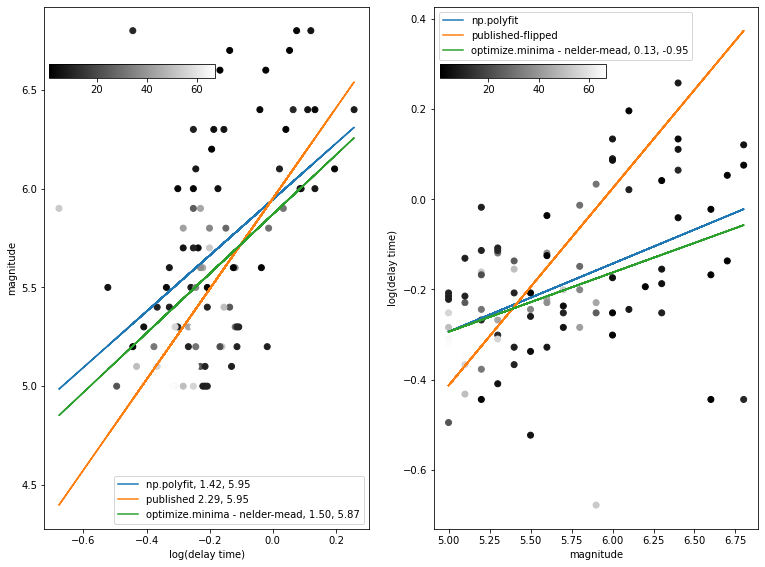

In [26]:
#%conda install ipympl
%matplotlib inline
fig, axs = plt.subplots(1,2, figsize=(12.8,9.6))
#===================================================================
sc = axs[0].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs[0].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs[0].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs[0].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs[0].set_xlabel('log(delay time)')
axs[0].set_ylabel('magnitude')

#===================================================================
sc = axs[1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
axs[1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

axs[1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
axs[1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
            label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

axs[1].set_ylabel('log(delay time)')
axs[1].set_xlabel('magnitude')
print(a,b)
print(res.x[0], res.x[1])
print(res)
axs[0].legend()
axs[1].legend()
plt.show()

In [21]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [27]:
H

27.945103367894465

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt